In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import cos, sin, pi

In [51]:
# генерация точек
def random_points(n):
    points = []
    for i in range(n):
        points.append(np.array([np.random.randint(0, 100), np.random.randint(0, 100)]))
    
    return points

In [52]:
# расстояние между точками
def distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [53]:
# начальные центроиды
def find_centroids(points, count):
    centroids = []
    center = sum(points) / len(points)
    R = 0
    for i in range(len(points)):
        R = max(R, distance(center, points[i]))
    for i in range(count):
        centroid_x = cos(2 * pi / count * i)
        centroid_y = sin(2 * pi / count * i)
        centroids.append(center + R * np.array([centroid_x, centroid_y]))
        
    return centroids

In [54]:
# вероятность принадлежности к кластерам
def calculate_new_probability(points, centroids, m):
    probabilities = np.zeros(shape=(len(centroids), len(points)))
    for point_index, point in enumerate(points):
        for cluster, centroid in enumerate(centroids):
            power = 2 / (1 - m)
            temp_sum = sum([(1 / distance(point, x)) ** power for x in centroids])
            probability = ((1 / distance(point, centroid)) ** power) / temp_sum
            probabilities[cluster][point_index] = probability

    return probabilities

In [55]:
# вычисление центроидов
def calculate_centroids(probabilities, centroids, points):
    new_centroids = []
    for cluster, centroid in enumerate(centroids):
        probabilities_sum = np.zeros(2)
        for point_index, point in enumerate(points):
            probabilities_sum += point * probabilities[cluster][point_index]
        new_centroids.append(probabilities_sum / sum(probabilities[cluster]))
        
    return new_centroids;

In [56]:
# отрисовка
def draw(probabilities, centroids, points, num):    
    colors = [plt.cm.get_cmap('hsv', len(probabilities) + 1)(x) for x in range(len(probabilities))]
    probs_transposed = probabilities.transpose()

    plt.gca().set_aspect('equal')

    for point_index, point in enumerate(points):
        cluster = max([x for x in enumerate(probs_transposed[point_index])], key=lambda x: x[1])[0]
        plt.scatter(*point, color=colors[cluster])

    for cluster, centroid in enumerate(centroids):
        plt.scatter(*centroid, s=200, color="black", marker="+")

In [57]:
def c_means(k, m):
    points = random_points(100)
    centroids = find_centroids(points, k)
    probabilities = calculate_new_probability(points, centroids, m)
    diff = np.full(np.shape(probabilities), 1)
    num = 1

    while (diff > 0.01).any():
        centroids = calculate_centroids(probabilities, centroids, points)
        new_matrix = calculate_new_probability(points, centroids, m)
        print('Итерация ' + str(num))
        draw(probabilities, centroids, points, num)
        plt.show()
        num += 1
        diff = abs(probabilities - new_matrix)
        probabilities = new_matrix        

Итерация 1


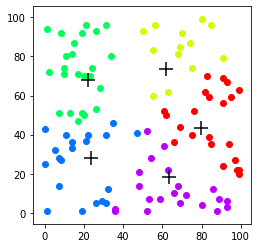

Итерация 2


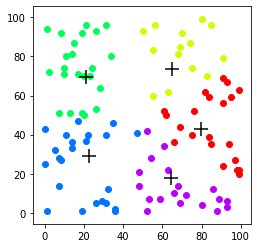

Итерация 3


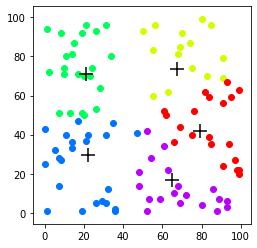

Итерация 4


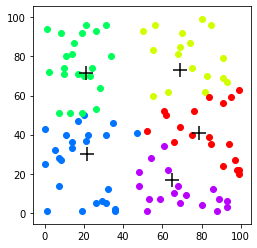

Итерация 5


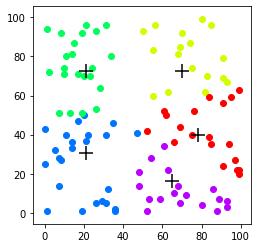

Итерация 6


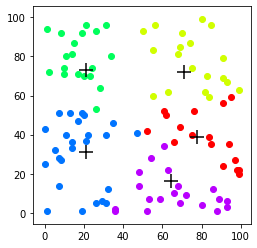

Итерация 7


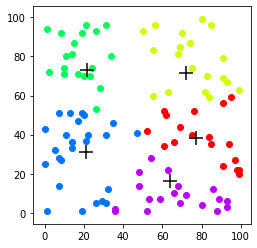

Итерация 8


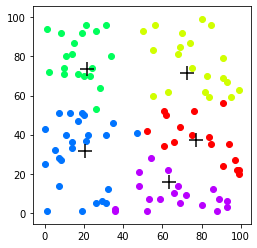

Итерация 9


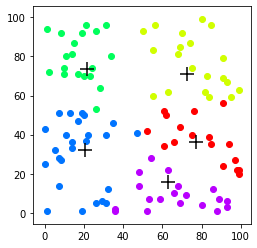

Итерация 10


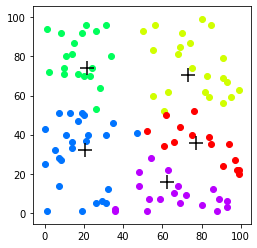

Итерация 11


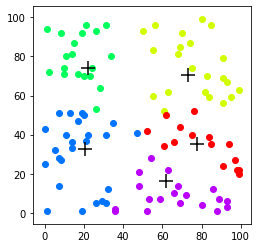

Итерация 12


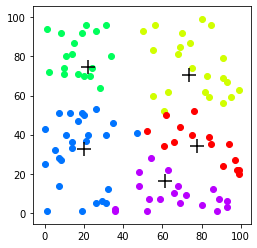

Итерация 13


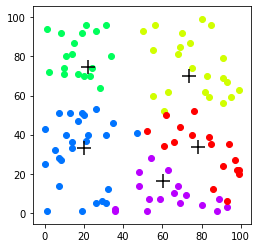

Итерация 14


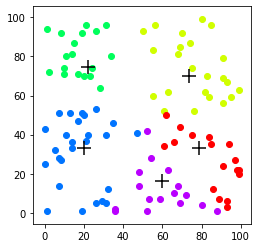

Итерация 15


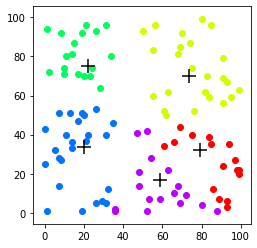

Итерация 16


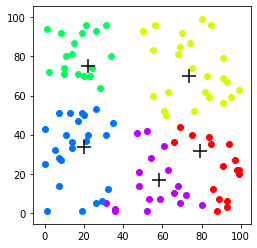

Итерация 17


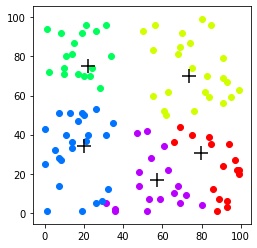

Итерация 18


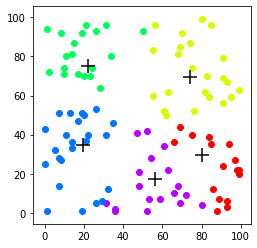

Итерация 19


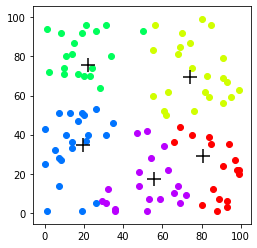

Итерация 20


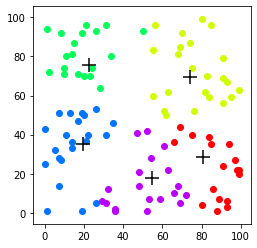

Итерация 21


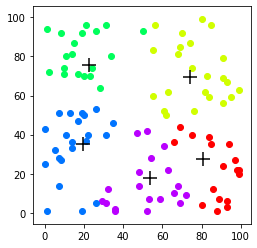

Итерация 22


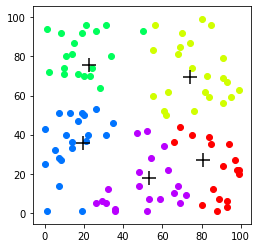

Итерация 23


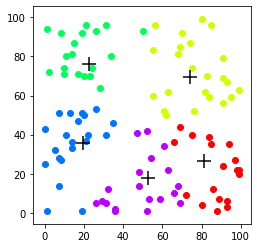

Итерация 24


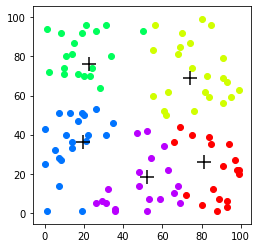

Итерация 25


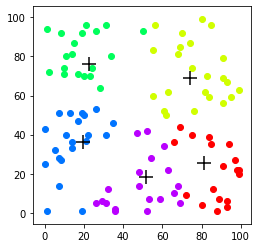

Итерация 26


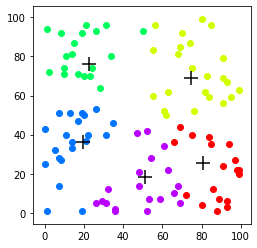

Итерация 27


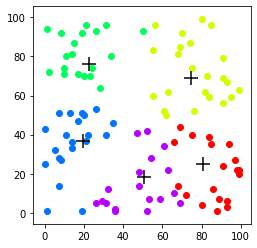

Итерация 28


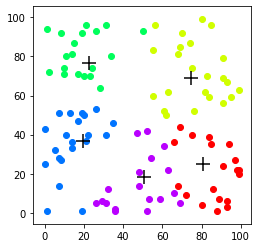

Итерация 29


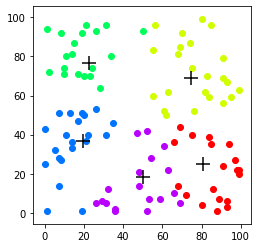

Итерация 30


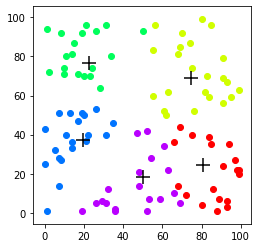

Итерация 31


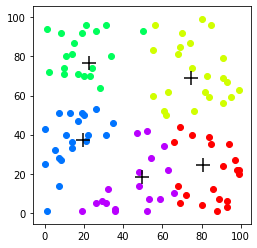

Итерация 32


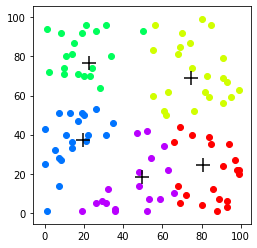

In [58]:
c_means(5, 0.3)